## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data = study_results.merge(mouse_metadata, how= "inner", on ="Mouse ID" )
combined_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [2]:
# Checking the number of mice in the DataFrame.
combined_data["Mouse ID"].count()


1893

In [3]:
#find the duplicated mice
mouse = combined_data[["Mouse ID", "Timepoint", "Age_months"]]
mouse_df = mouse.groupby(["Mouse ID" , "Timepoint"]).count()
mouse_df.loc[mouse_df["Age_months"]>1 ]

Age_months
Mouse ID Timepoint            
g989     0                   2
         5                   2
         10                  2
         15                  2
         20                  2

In [4]:
combined_data = combined_data.loc[combined_data["Mouse ID"] != "g989"]

In [5]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
[[combined_data["Mouse ID"].duplicated()]]
duplicated_df = combined_data.loc[combined_data["Mouse ID"].duplicated(),["Mouse ID","Timepoint"]]
duplicated_df

,Mouse ID,Timepoint
1,b128,5
2,b128,10
3,b128,15
4,b128,20
5,b128,25
...,...,...
1888,m601,25
1889,m601,30
1890,m601,35
1891,m601,40


In [6]:
# Optional: Get all the data for the duplicate mouse ID. 
all_duplicated = combined_data.loc[combined_data["Mouse ID"].duplicated(),["Mouse ID","Timepoint", "Tumor Volume (mm3)", "Metastatic Sites", "Drug Regimen", "Sex" ,"Age_months", "Weight (g)"]]
all_duplicated

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
5,b128,25,43.262145,1,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_data.drop_duplicates(subset=['Mouse ID'])
clean_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
10,f932,0,45.0,0,Ketapril,Male,15,29
11,g107,0,45.0,0,Ketapril,Female,2,29
19,a457,0,45.0,0,Ketapril,Female,11,30
22,c819,0,45.0,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1848,t565,0,45.0,0,Capomulin,Female,20,17
1858,i557,0,45.0,0,Capomulin,Female,1,24
1868,m957,0,45.0,0,Capomulin,Female,3,19
1878,f966,0,45.0,0,Capomulin,Male,16,17


In [8]:
# Checking the number of mice in the clean DataFrame.
mouse_number = clean_df["Mouse ID"].count()
mouse_number

248

## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straightforward, creating multiple series and putting them all together at the end.
tumor_mean = combined_data.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
tumor_median = combined_data.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]
tumor_variance = combined_data.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"]
tumor_std = combined_data.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"]
tumor_sem = combined_data.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"]


tumor_mean
tumor_median
tumor_variance
tumor_std
tumor_sem



Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.544332
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: Tumor Volume (mm3), dtype: float64

In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function.
summary_statistics = pd.DataFrame({ "Average Tumore Volume" : tumor_mean,
                                    "Tumore Median" : tumor_median,
                                    "Tumore Variance" : tumor_variance,
                                    "Tumore Standard Deviation" : tumor_std,
                                    "Tumor SEM" : tumor_sem})

summary_statistics



,Average Tumore Volume,Tumore Median,Tumore Variance,Tumore Standard Deviation,Tumor SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar Plots

In [11]:
combined_data.groupby(["Drug Regimen"]).count()["Mouse ID"]

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     148
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64

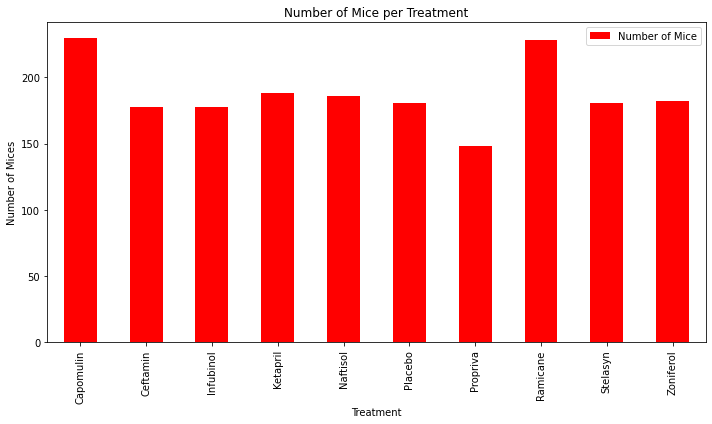

In [12]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas.
mice_number = combined_data.groupby(["Drug Regimen"]).count()["Mouse ID"]
bar_df = pd.DataFrame({ "Number of Mice" : mice_number})
bar_df.plot(kind= "bar",
            color = "red",
              figsize = (10,6),
            title = "Number of Mice per Treatment",
           xlabel = "Treatment",
           ylabel = "Number of Mices")

plt.tight_layout()


plt.show()

In [13]:
import numpy as np

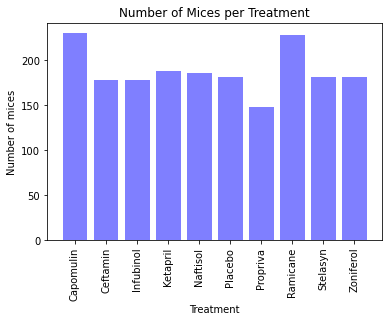

In [14]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.
mice_number = combined_data.groupby(["Drug Regimen"]).count()["Mouse ID"]
x_axis = np.arange(len(mice_number))

mice_number_df=pd.DataFrame({ "Number of Mices" : mice_number})
mice_number_df
x_axis = np.arange(len(mice_number))
height = mice_number_df["Number of Mices"]
tick_label = mice_number
plt.bar( x=x_axis,
       height = height,
        color ="b",
        alpha= 0.5,
        align = "center",
        tick_label = tick_label
      
         )
plt.xticks(ticks= x_axis,
           labels = ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'],  rotation='vertical')
plt.xlabel("Treatment")
plt.ylabel("Number of mices")
plt.title("Number of Mices per Treatment")
plt.show()

## Pie Plots

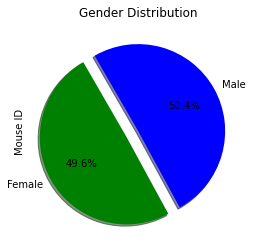

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
sex_data = clean_df.groupby(["Sex"]).count()["Mouse ID"]

sex_data_df = pd.DataFrame({ "Count" : sex_data})
total_count = sex_data_df["Count"].sum()
gender_percentage = sex_data_df["Count"]/ total_count * 100
sex_data_df = pd.DataFrame({ "Count" : sex_data,
                            "Percentage Count" : gender_percentage})
sex_data.plot(kind = "pie",
             title = "Gender Distribution",
             colors = ["green","blue"],
             shadow = True,
             autopct="%1.1f%%",
            startangle =120,
              explode = (0.15,0)
             )
plt.show()

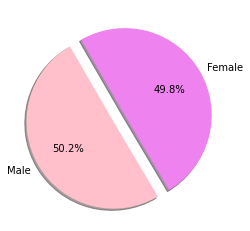

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(x=[50.2 , 49.8],
       labels = ["Male", "Female"],
       colors = ["Pink", "Violet"],
       autopct="%1.1f%%",
       shadow=True,
       explode = (0.15, 0),
       startangle = 120)
plt.show()

## Quartiles, Outliers and Boxplots

In [19]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 
#mice_number_df.sort_values(by = ["Drug Regimen"])
drug_capomulin = combined_data.loc[combined_data["Drug Regimen"]== "Capomulin"]
drug_capomulin_final = drug_capomulin.loc[drug_capomulin["Timepoint"]== 45]
#drug_campulin_final = drug_capomulin_final.drop_duplicates(subset = ["Mouse ID"])
tumor_campulin = drug_capomulin_final["Tumor Volume (mm3)"]
quartile = drug_capomulin_final["Tumor Volume (mm3)"].quantile(q=[0.25, 0.50, 0.75])
lowerq = quartile[0.25]
upperq = quartile [0.75]
median = quartile[0.50]
iqr = upperq - lowerq
upper_bound = lowerq -(iqr * 1.5)
lower_bound = upperq + (iqr * 1.5)
print(f"The upper quartile of Capomulin is {upperq}")
print(f"The lower quartile of Capomulin is {lowerq}")
print(f"The median of Capomulin is {median}")
print(f"The interquartile range of Capomulin is {iqr}")
print(f"Values above {upper_bound} and values lower {lower_bound} are outliers of Capomulin")

The upper quartile of Capomulin is 40.1592203
The lower quartile of Capomulin is 32.37735684
The median of Capomulin is 37.31184577
The interquartile range of Capomulin is 7.781863460000004
Values above 20.70456164999999 and values lower 51.83201549 are outliers of Capomulin


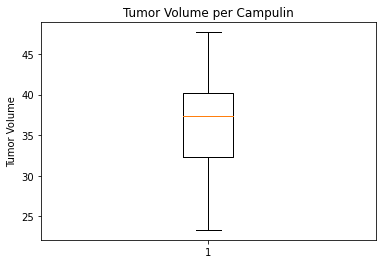

In [20]:
campulin_box = plt.boxplot(x=tumor_campulin)
plt.ylabel("Tumor Volume")
plt.title("Tumor Volume per Campulin")
plt.show()

In [21]:

drug_Ramicane = combined_data.loc[combined_data["Drug Regimen"]== "Ramicane"]
drug_Ramicane_final = drug_Ramicane.loc[drug_Ramicane["Timepoint"]== 45]
tumor_Ramicane = drug_Ramicane_final["Tumor Volume (mm3)"]
drug_Ramicane_final=drug_Ramicane_final.sort_values(by= ["Tumor Volume (mm3)"])
quartile_r = drug_Ramicane_final["Tumor Volume (mm3)"].quantile(q=[0.25, 0.50, 0.75])
lowerq_r = quartile_r[0.25]
upperq_r = quartile_r [0.75]
median_r=quartile_r[0.5]
iqr_r = upperq_r - lowerq_r
upper_bound_r = lowerq_r -(iqr_r * 1.5)
lower_bound_r = upperq_r + (iqr_r * 1.5)
print(f"The upper quartile of Ramicane is {upperq_r}")
print(f"The lower quartile of Ramicane is {lowerq_r}")
print(f"The interquartile range of Ramicane is {iqr_r}")
print(f"The median of Ramicane is {median_r}")
print(f"Values above {upper_bound_r} and values lower {lower_bound_r} are outliers of Ramicane")


The upper quartile of Ramicane is 38.5083053075
The lower quartile of Ramicane is 30.981175225
The interquartile range of Ramicane is 7.527130082500001
The median of Ramicane is 34.848627300000004
Values above 19.69048010125 and values lower 49.79900043125001 are outliers of Ramicane


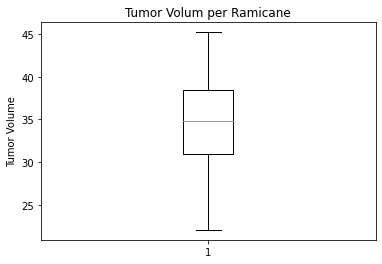

In [22]:
ramicane_box = plt.boxplot(x=tumor_Ramicane)
plt.ylabel("Tumor Volume")
plt.title("Tumor Volum per Ramicane")
plt.show()

In [23]:
#mice_number_df.sort_values(by = ["Number of Mices"], ascending = False)
drug_Infubinol = combined_data.loc[combined_data["Drug Regimen"]== "Infubinol"]
drug_Infubinol_final = drug_Infubinol.loc[drug_Infubinol["Timepoint"]== 45]
drug_Infubinol_final=drug_Infubinol_final.sort_values(by=["Tumor Volume (mm3)"], ascending =False )
tumor_Infubinol = drug_Infubinol_final["Tumor Volume (mm3)"]
tumor = drug_Infubinol_final["Tumor Volume (mm3)"]
#drug_Infubinol_final = drug_Infubinol_final.drop_duplicates(subset = ["Mouse ID"])
quartile_i = tumor.quantile(q=[0.25, 0.50, 0.75])
lowerq_i = quartile_i[0.25]
upperq_i = quartile_i [0.75]
median_i = quartile_i[0.5]
iqr_i = upperq_i - lowerq_i
upper_bound_i = lowerq_i -(iqr_i * 1.5)
lower_bound_i = upperq_i + (iqr_i * 1.5)
print(f"The upper quartile of Infubinol is {upperq_i}")
print(f"The lower quartile of Infubinol is {lowerq_i}")
print(f"The Median of Imfubinol is {median_i}")
print(f"The interquartile range of Infubinol is {iqr_i}")
print(f"Values above {upper_bound_i} and values lower {lower_bound_i} are outliers of Infubinol")

The upper quartile of Infubinol is 67.68556862
The lower quartile of Infubinol is 62.75445141
The Median of Imfubinol is 66.08306589
The interquartile range of Infubinol is 4.9311172099999965
Values above 55.35777559500001 and values lower 75.08224443499999 are outliers of Infubinol


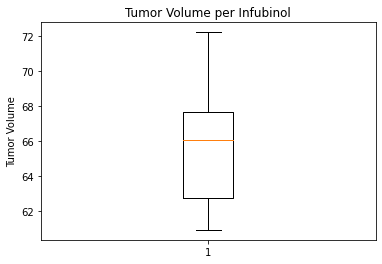

In [24]:
infubinol_box = plt.boxplot(x=tumor_Infubinol)
plt.ylabel("Tumor Volume")
plt.title("Tumor Volume per Infubinol")
plt.show()

In [25]:
drug_Ceftamin = combined_data.loc[combined_data["Drug Regimen"]== "Ceftamin"]
drug_Ceftamin_final = drug_Ceftamin.loc[drug_Ceftamin["Timepoint"]== 45]
drug_Ceftamin_final=drug_Ceftamin_final.sort_values(by=["Tumor Volume (mm3)"], ascending =False )
tumor_Ceftamin = drug_Ceftamin_final["Tumor Volume (mm3)"]
#drug_Ceftamin_final = drug_Ceftamin_final.drop_duplicates(subset = ["Mouse ID"])
quartile_c =drug_Ceftamin_final["Tumor Volume (mm3)"].quantile(q=[0.25, 0.50, 0.75])
lowerq_c = quartile_c[0.25]
upperq_c = quartile_c [0.75]
median_c=quartile_c[0.5]
iqr_c = upperq_c - lowerq_c
upper_bound_c = lowerq_c -(iqr_c * 1.5)
lower_bound_c = upperq_c + (iqr_c * 1.5)
print(f"The upper quartile of Ceftamin is {upperq_c}")
print(f"The lower quartile of Ceftamin is {lowerq_c}")
print(f"The Median of Ceftamin is {median_c}")
print(f"The interquartile range of Ceftamin is {iqr_c}")
print(f"Values above {upper_bound_c} and values lower {lower_bound_c} are outliers of Ceftamin")

The upper quartile of Ceftamin is 67.52748237
The lower quartile of Ceftamin is 61.43389223
The Median of Ceftamin is 64.29983003
The interquartile range of Ceftamin is 6.093590140000003
Values above 52.29350701999999 and values lower 76.66786758 are outliers of Ceftamin


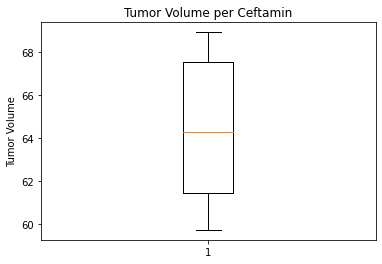

In [26]:
ceftamin_box = plt.boxplot(x=tumor_Ceftamin)
plt.ylabel("Tumor Volume")
plt.title("Tumor Volume per Ceftamin")
plt.show()

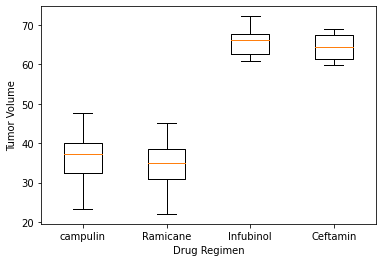

In [27]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
box_plot = [tumor_campulin , tumor_Ramicane, tumor_Infubinol, tumor_Ceftamin]
regimen= ["campulin" , "Ramicane", "Infubinol", "Ceftamin"]
plt.boxplot(box_plot , labels= regimen)
plt.xlabel("Drug Regimen")
plt.ylabel("Tumor Volume")
plt.show()

##### Line and Scatter Plots

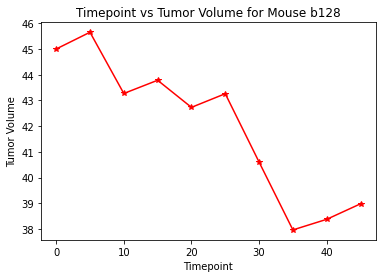

In [28]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
b128_mouse = drug_capomulin.loc[drug_capomulin["Mouse ID"]=="b128"]
x_axis = b128_mouse["Timepoint"]
y_axis= b128_mouse["Tumor Volume (mm3)"]
plt.plot(x_axis, y_axis,
        marker ="*",
        color ="r")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume")
plt.title("Timepoint vs Tumor Volume for Mouse b128")
plt.show()

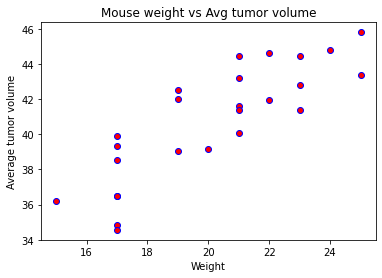

In [29]:
#generate a scattr plot of mouse weight versus average tumor volume for the Capomulin treatment regimen.
avg_tumor = drug_capomulin.groupby(["Mouse ID", "Weight (g)"]).mean()["Tumor Volume (mm3)"].reset_index()


plt.scatter(x= avg_tumor["Weight (g)"],
           y=avg_tumor["Tumor Volume (mm3)"],
           color="r",
           edgecolors ="b")
avg_tumor_plot = plt.title("Mouse weight vs Avg tumor volume")
plt.xlabel("Weight")
plt.ylabel("Average tumor volume")
plt.show()

### Correlation and Regression

In [30]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen


In [31]:
from scipy import stats

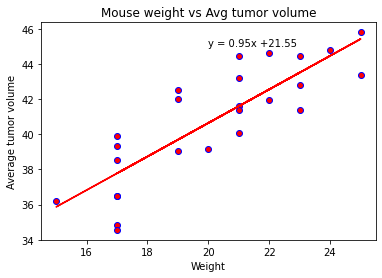

In [32]:
(slope , intercept, rvalue, pvalue, stderr)= stats.linregress(avg_tumor["Weight (g)"],avg_tumor["Tumor Volume (mm3)"] )
line_eq = f"y = {round(slope,2)}x +{round(intercept,2)}"
plt.scatter(x= avg_tumor["Weight (g)"],
           y=avg_tumor["Tumor Volume (mm3)"],
           color="r",
           edgecolors ="b")
x_values = avg_tumor["Weight (g)"]
y_values = avg_tumor["Tumor Volume (mm3)"]
regress_value = x_values * slope + intercept
plt.plot(x_values, regress_value, "r-")
plt.annotate(line_eq, (20,45))
plt.title("Mouse weight vs Avg tumor volume")
plt.xlabel("Weight")
plt.ylabel("Average tumor volume")
plt.show()